<a href="https://colab.research.google.com/github/ThantiwaChaimanee/AI-Intern/blob/Wa/carMatching_Train%26Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel

/content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/carMatching/carMatchingFullModel


In [ ]:
!ls

 carMatching_Train.ipynb   old	'pic label to csv.ipynb'   result_csv   yolov5


#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
%cd /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel
!git clone https://github.com/ultralytics/yolov5  # clone repo

/content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/carMatching/carMatchingFullModel
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5
# !git fetch&git pull

%pip install -qr requirements.txt  # install dependencies
#%pip uninstall -y wandb 

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# Create file dataset.yaml


In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/test_car_angle.yaml
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/train
val: /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/train
test: /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/test

# Classes
nc: 4 #number of class will equal number of names
names: ['Back', 'Front', 'Left', 'Right']

In [ ]:
%cat /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/test_car_angle.yaml

# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/train
val: /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/train
test: /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/test

# Classes
nc: 4 #number of class will equal number of names
names: ['Back', 'Front', 'Left', 'Right']

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.9 MB/s 
     |████████████████████████████████| 181 kB 68.9 MB/s 
     |████████████████████████████████| 145 kB 65.7 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=9070c71793905f2bd9f7e3afed73b80fc97ff67bffa54dbc3ee94b40966b5121
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


# **Train**

### Model Small YOLOv5s
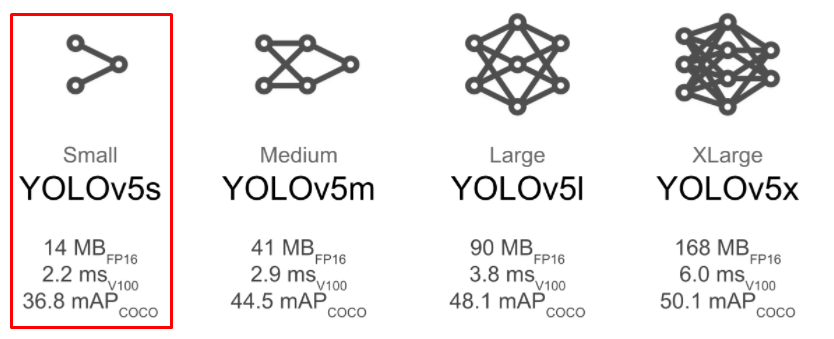

In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
%cd /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5

# !python train.py --img 640  --epochs 3 --data ./data/ford/everest/evrest.yaml --weights yolov5s.pt --name result_s
#epoch 150, train class = 10, test = 5-6
!python train.py --img 640 --batch 16 --epochs 60 --data /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/test_car_angle.yaml --weights /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/runs/train/exp4/weights/best.pt

/content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/carMatching/Model/yolov5
wandb: Currently logged in as: thantiwa. Use `wandb login --relogin` to force relogin
train: weights=/content/drive/MyDrive/INtern/Project/carMatching/Model/yolov5/runs/train/exp4/weights/best.pt, cfg=, data=/content/drive/MyDrive/INtern/Project/carMatching/Model/yolov5/data/images/test_car_angle.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 180, done.
remote: Counting objects: 100%

# **test**

In [ ]:
!python detect.py --agnostic --weights /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/runs/train/exp5/weights/best.pt --conf 0.80 --source /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/demo/not_complete_angle --save-txt

detect: weights=['/content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/runs/train/exp5/weights/best.pt'], source=/content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/demo/not_complete_angle, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-143-g6ea81bb torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients
image 1/10 /content/drive/.shortcut-targets-by-id/1xGpwFZWnMwZbUXGO12RnmerSUHUra6SN/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/demo/not_complete_angle/65001E00328_002.jpeg: 640x480 1 Back, Done

# **Export**

In [ ]:
# git clone https://github.com/ultralytics/yolov5  # clone repo
!cd yolov5
!pip install -r requirements.txt  # base requirements
!pip install coremltools>=4.1 onnx>=1.9.0 scikit-learn==0.19.2  # export requirements

/bin/bash: line 0: cd: yolov5: No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.19.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.19.2 which is incompatible.


In [ ]:
!python export.py --include onnx --weights /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/runs/train/exp5/weights/best.pt --img 640 --batch 1

usage: export.py [-h] [--data DATA] [--weights WEIGHTS [WEIGHTS ...]]
                 [--imgsz IMGSZ [IMGSZ ...]] [--batch-size BATCH_SIZE]
                 [--device DEVICE] [--half] [--inplace] [--train] [--optimize]
                 [--int8] [--dynamic] [--simplify] [--opset OPSET] [--verbose]
                 [--workspace WORKSPACE] [--nms] [--agnostic-nms]
                 [--topk-per-class TOPK_PER_CLASS] [--topk-all TOPK_ALL]
                 [--iou-thres IOU_THRES] [--conf-thres CONF_THRES]
                 [--include INCLUDE [INCLUDE ...]]
export.py: error: unrecognized arguments: --name carMatchingModel


In [ ]:
!python detect.py --weights /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/runs/train/exp5/weights/best.onnx --conf 0.90 --source /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/test_isuzu_50 --save-txt

detect: weights=['/content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/runs/train/exp5/weights/best.onnx'], source=/content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/data/images/test_isuzu_50, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.9, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-143-g6ea81bb torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/drive/MyDrive/INtern/Project/carMatching/carMatchingFullModel/yolov5/runs/train/exp5/weights/best.onnx for ONNX Runtime inference...
requirements: onnxruntime-gpu not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-py